<a href="https://colab.research.google.com/github/phanishwarKumar/Projects/blob/master/ARU_Column_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import sys, time, os, warnings 
import seaborn as sb
from collections import Counter 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))


def set_seed(sd=123):
    from numpy.random import seed
    from tensorflow import set_random_seed
    import random as rn
    ## numpy random seed
    seed(sd)
    ## core python's random number 
    rn.seed(sd)
    ## tensor flow's random number
    set_random_seed(sd)

python 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
keras version 2.11.0
tensorflow version 2.11.0


In [ ]:
from google.colab import drive

#downloading the data
drive.mount('/content/drive',force_remount=True)
#%cd /content/drive/MyDrive/DL
DATA_PATH = "/content/drive/MyDrive/MTech_Dissertation/"

MessageError: ignored

In [29]:
dataset = pd.read_csv("ARU_Top_Temp.csv",index_col=0)
#dataset = dataset.tail(100)

In [30]:
#dataset = pd.read_csv(DATA_PATH+"wild_naphtha.csv",index_col=0)
#dataset.head()

In [31]:
#dataset['Feed SG_-'] = dataset['Feed SG_-']*1000
#dataset['ISOMERATE_SG'] = dataset['FEED_SG']*1000
#dataset['H2_HC_ratio'] = (dataset['HYDROGEN TO BENSAT (MASS FLOW METER)']+dataset['HYDROGEN TO ISOM'])/dataset['ISOM_Fresh_Feed']

In [32]:
'''
Recognize whether a column is numerical or categorical.'''


def utils_recognize_type(dtf, col, max_cat=20):
    if (dataset[col].dtype == "O") | (dataset[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

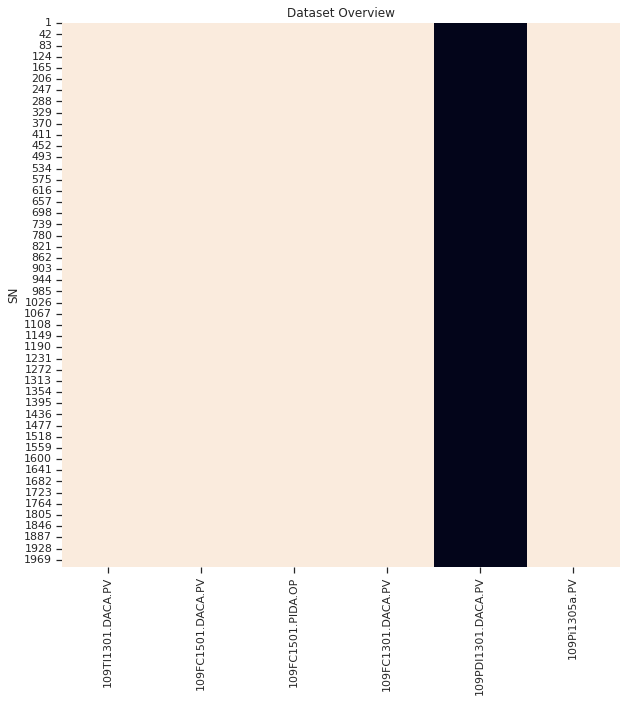

 Numeric   Categorical   NaN 


In [33]:
dic_cols = {col:utils_recognize_type(dataset, col, max_cat=20) for col in dataset.columns}
heatmap = dataset.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Numeric ", "\033[1;30;41m Categorical ", "\033[1;30;47m NaN ")

In [34]:
'ask data correction strategy'
ask_data_corr = "mean"

if ask_data_corr =="median":
  dataset= dataset.apply(lambda x: x.fillna(x.median()))
elif ask_data_corr =="mode":
  dataset= dataset.apply(lambda x: x.fillna(x.mode()))
else:
  dataset= dataset.apply(lambda x: x.fillna(x.median()))

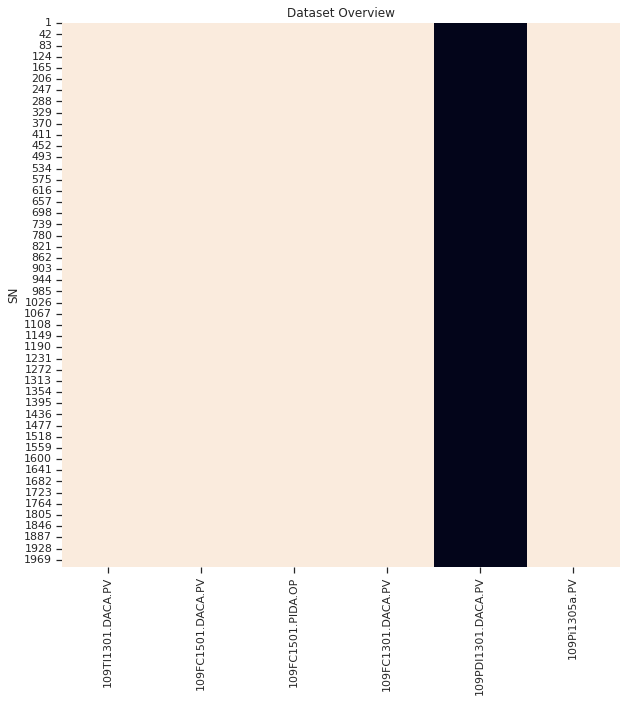

 Numeric   Categorical   NaN 


In [35]:
dataset= dataset.apply(lambda x: x.fillna(x.mean())) 
dic_cols = {col:utils_recognize_type(dataset, col, max_cat=20) for col in dataset.columns}
heatmap = dataset.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Numeric ", "\033[1;30;41m Categorical ", "\033[1;30;47m NaN ")

In [36]:
dataset

,109TI1301.DACA.PV,109FC1501.DACA.PV,109FC1501.PIDA.OP,109FC1301.DACA.PV,109PDI1301.DACA.PV,109Pi1305a.PV
SN,,,,,,
1,97.07,12.84,20.50,229.63,0.25,1.19
2,97.15,12.83,20.50,229.35,0.25,1.20
3,97.66,12.87,20.50,228.76,0.25,1.23
4,97.43,12.85,20.50,228.11,0.25,1.25
5,97.82,12.91,20.50,228.12,0.24,1.24
...,...,...,...,...,...,...
1990,93.48,12.83,21.43,232.00,0.25,1.20
1991,93.24,12.60,20.62,228.32,0.25,1.20
1992,95.32,12.51,20.50,226.86,0.25,1.22


Making New Features

In [37]:
#dataset['DIH_RATIO'] = dataset['DIH RECYCLE']/dataset['DIP_BTM']
#dataset['THSND_OCTANE_BBL'] = dataset['TOTAL ISOMERATE']*dataset['ISOMERATE_RON']*6.289/1000

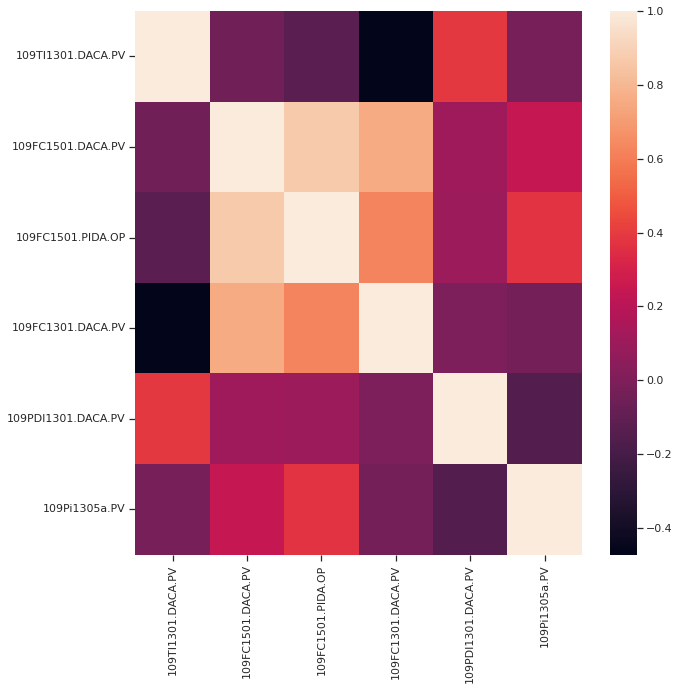

In [38]:
corr_matrix = pd.DataFrame(dataset.corr())
# plotting correlation heatmap
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 10})
dataplot = sb.heatmap(dataset.corr())

plt.show()

In [39]:
dataset.columns

Index(['109TI1301.DACA.PV', '109FC1501.DACA.PV', '109FC1501.PIDA.OP',
       '109FC1301.DACA.PV', '109PDI1301.DACA.PV', '109Pi1305a.PV'],
      dtype='object')

Select Features and Label

In [40]:
sel_features = ['109FC1501.DACA.PV', '109FC1501.PIDA.OP',
       '109FC1301.DACA.PV', '109PDI1301.DACA.PV', '109Pi1305a.PV']

In [41]:
sel_label = ['109TI1301.DACA.PV']

In [42]:
features = dataset[sel_features].copy()

In [43]:
features

,109FC1501.DACA.PV,109FC1501.PIDA.OP,109FC1301.DACA.PV,109PDI1301.DACA.PV,109Pi1305a.PV
SN,,,,,
1,12.84,20.50,229.63,0.25,1.19
2,12.83,20.50,229.35,0.25,1.20
3,12.87,20.50,228.76,0.25,1.23
4,12.85,20.50,228.11,0.25,1.25
5,12.91,20.50,228.12,0.24,1.24
...,...,...,...,...,...
1990,12.83,21.43,232.00,0.25,1.20
1991,12.60,20.62,228.32,0.25,1.20
1992,12.51,20.50,226.86,0.25,1.22


In [44]:
lbl='109TI1301.DACA.PV'

In [45]:
labels = dataset[lbl]


In [46]:
labels

SN
1       97.07
2       97.15
3       97.66
4       97.43
5       97.82
        ...  
1990    93.48
1991    93.24
1992    95.32
1993    94.58
1994    95.07
Name: 109TI1301.DACA.PV, Length: 1994, dtype: float64

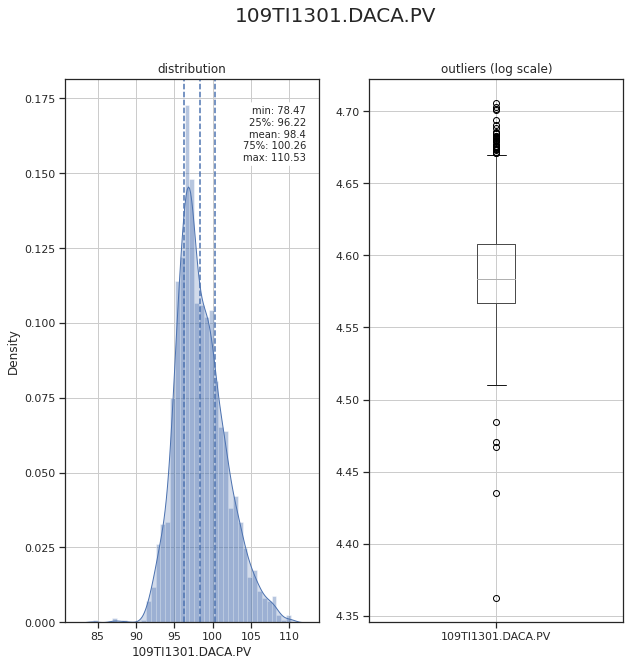

In [47]:
x = lbl

plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dataset[x].fillna(dataset[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dataset[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dataset[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])


plt.show()

array([[<Axes: xlabel='109TI1301.DACA.PV', ylabel='109TI1301.DACA.PV'>,
        <Axes: xlabel='109FC1501.DACA.PV', ylabel='109TI1301.DACA.PV'>,
        <Axes: xlabel='109FC1501.PIDA.OP', ylabel='109TI1301.DACA.PV'>,
        <Axes: xlabel='109FC1301.DACA.PV', ylabel='109TI1301.DACA.PV'>,
        <Axes: xlabel='109PDI1301.DACA.PV', ylabel='109TI1301.DACA.PV'>,
        <Axes: xlabel='109Pi1305a.PV', ylabel='109TI1301.DACA.PV'>],
       [<Axes: xlabel='109TI1301.DACA.PV', ylabel='109FC1501.DACA.PV'>,
        <Axes: xlabel='109FC1501.DACA.PV', ylabel='109FC1501.DACA.PV'>,
        <Axes: xlabel='109FC1501.PIDA.OP', ylabel='109FC1501.DACA.PV'>,
        <Axes: xlabel='109FC1301.DACA.PV', ylabel='109FC1501.DACA.PV'>,
        <Axes: xlabel='109PDI1301.DACA.PV', ylabel='109FC1501.DACA.PV'>,
        <Axes: xlabel='109Pi1305a.PV', ylabel='109FC1501.DACA.PV'>],
       [<Axes: xlabel='109TI1301.DACA.PV', ylabel='109FC1501.PIDA.OP'>,
        <Axes: xlabel='109FC1501.DACA.PV', ylabel='109FC1501.PIDA.OP

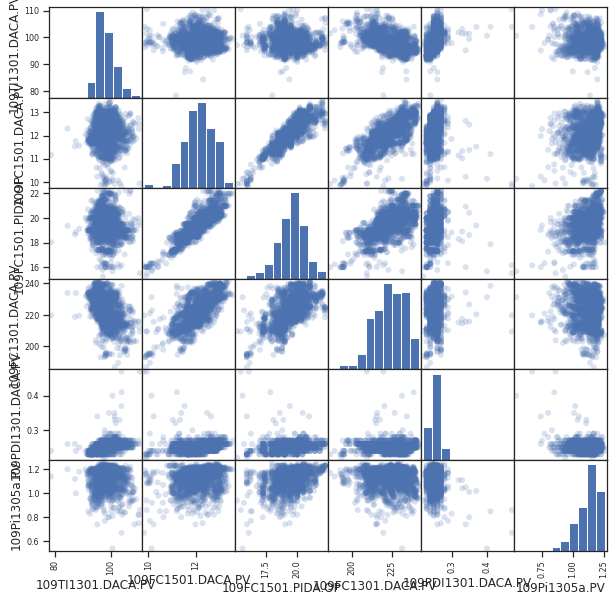

In [48]:
pd.plotting.scatter_matrix(dataset, alpha=0.2,grid = True, marker = 'o')

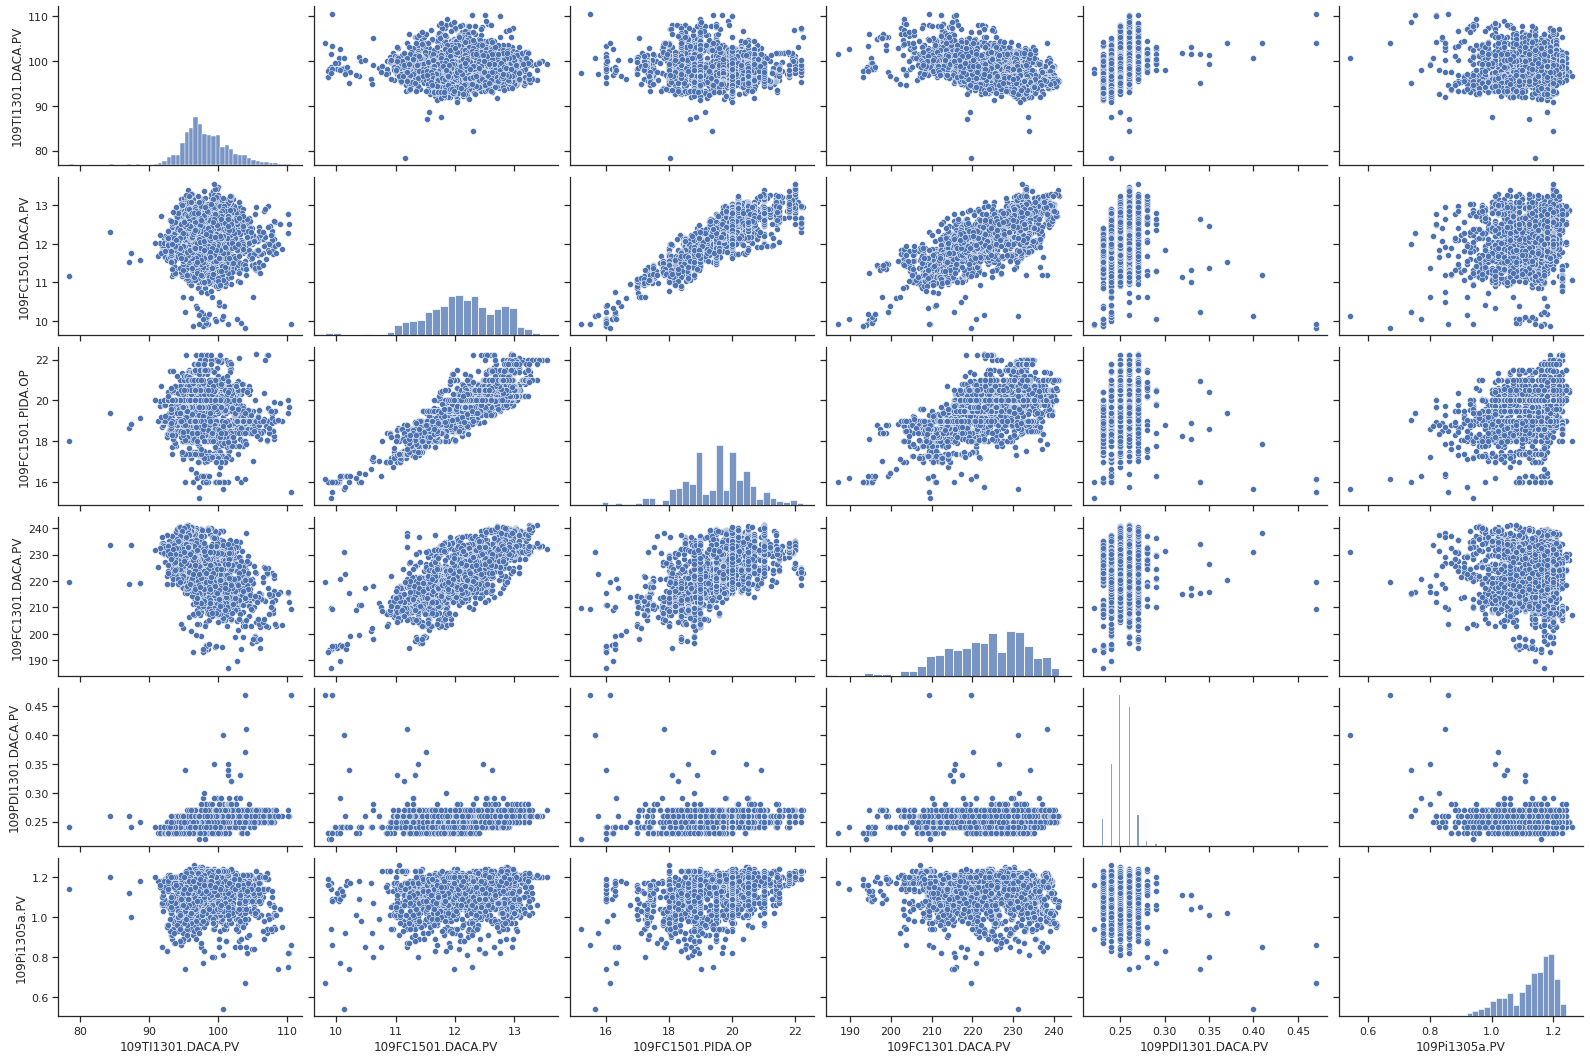

In [49]:
sns.set_theme(style="ticks")
sns.pairplot(dataset, aspect = 1.5)

In [50]:
features.columns.values

array(['109FC1501.DACA.PV', '109FC1501.PIDA.OP', '109FC1301.DACA.PV',
       '109PDI1301.DACA.PV', '109Pi1305a.PV'], dtype=object)

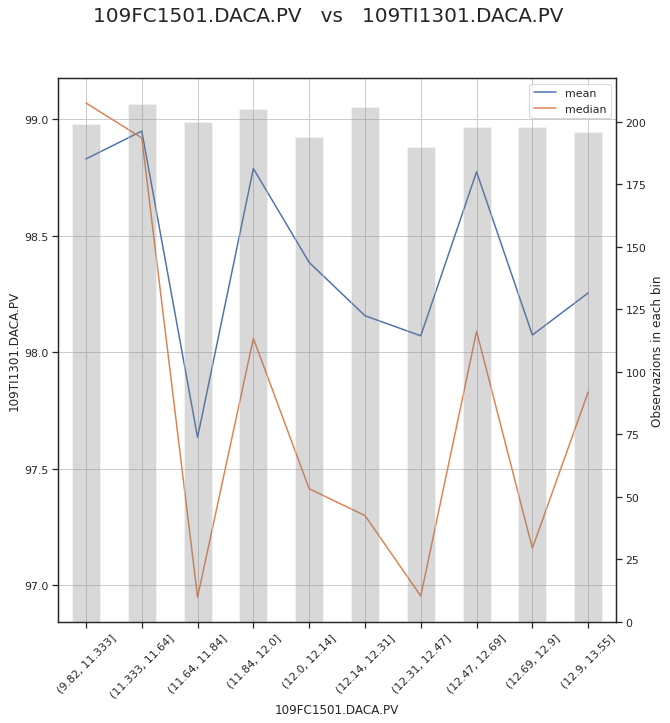

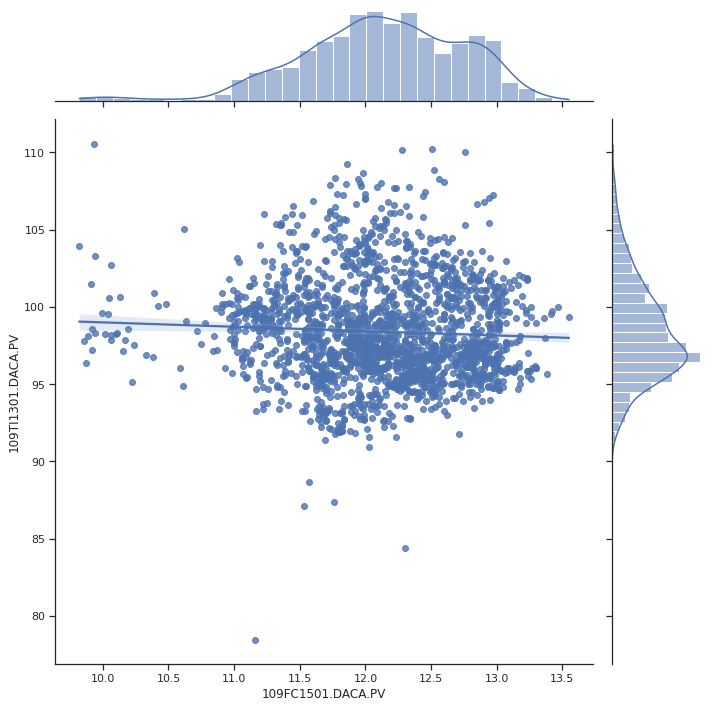

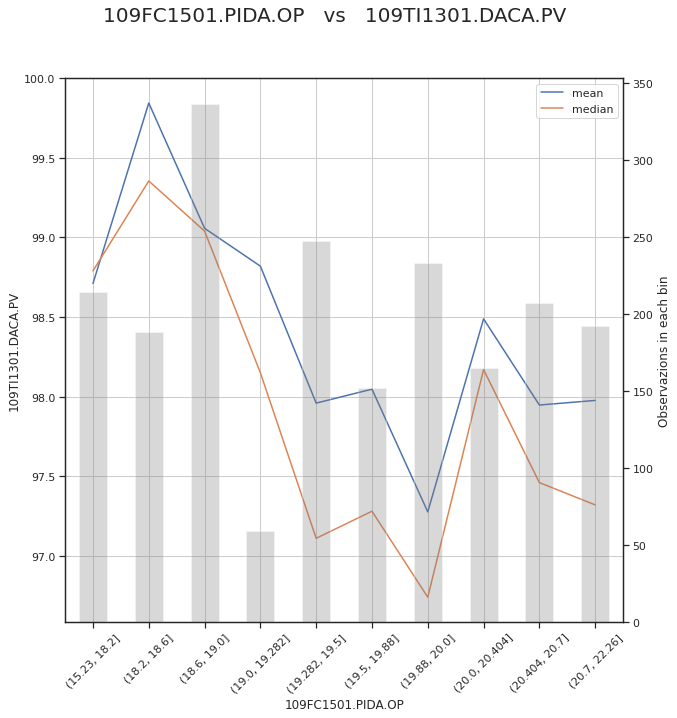

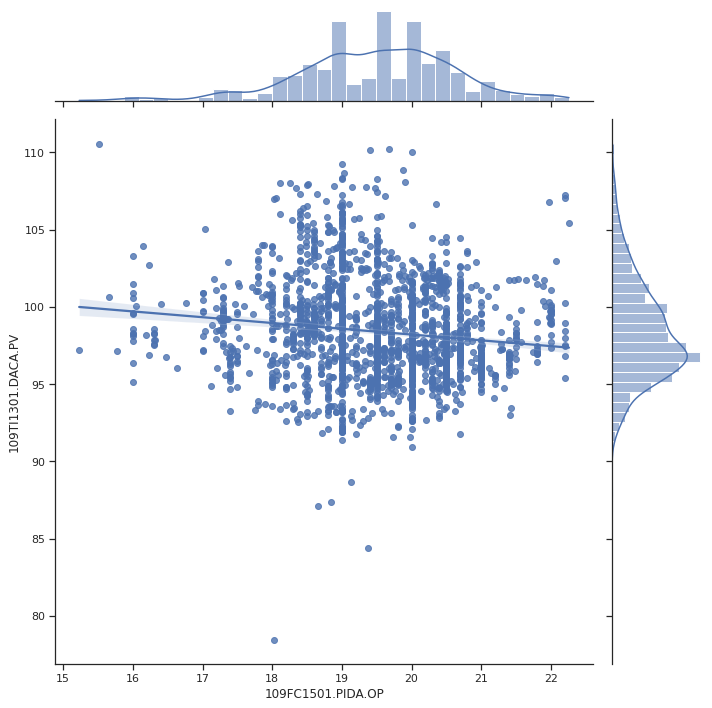

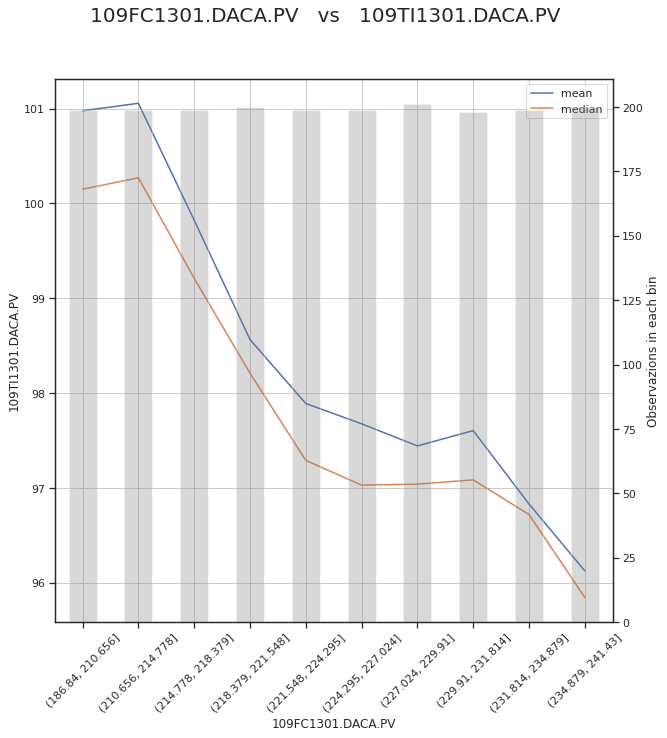

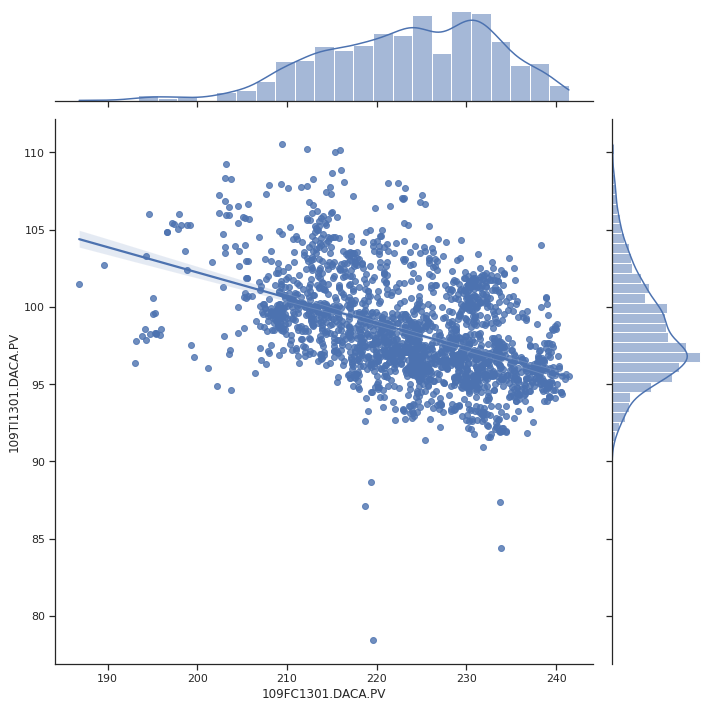

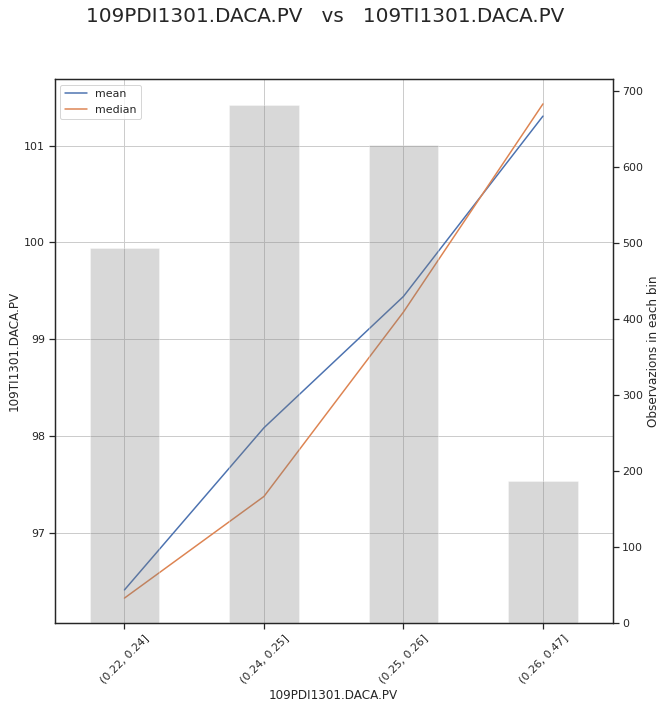

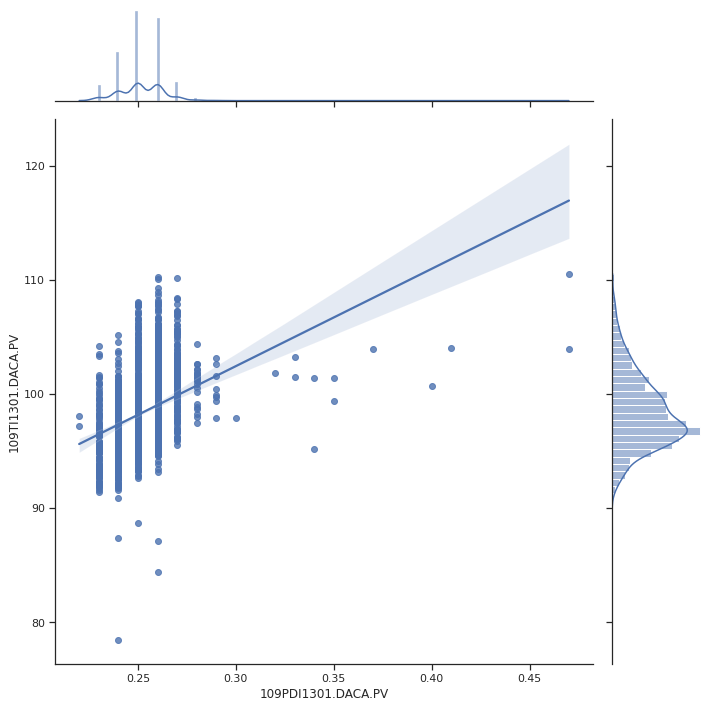

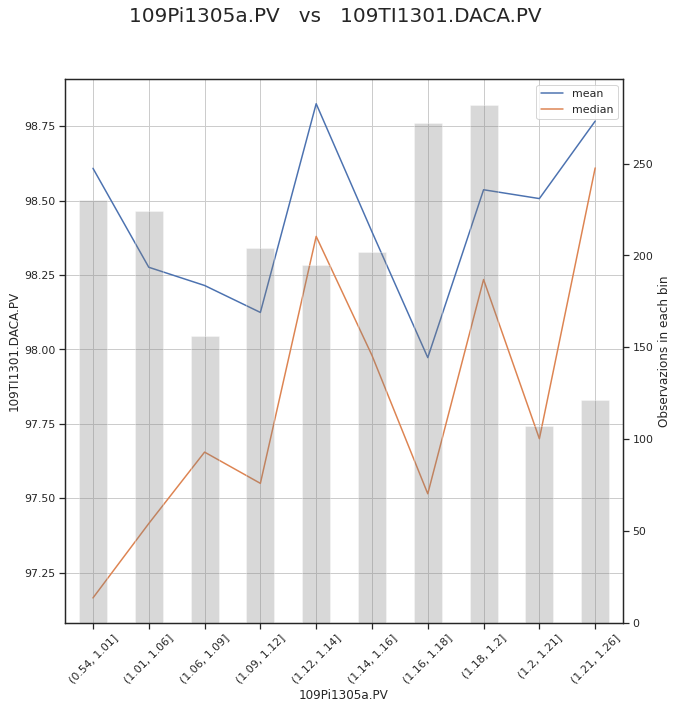

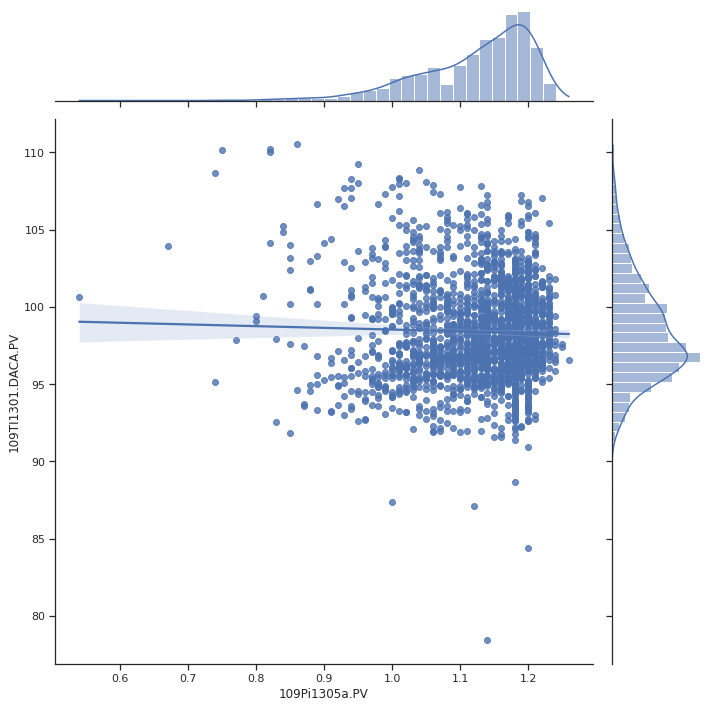

In [51]:
for i in range(0,len(features.columns.values)):
  x, y = features.columns.values[i], lbl
  figsize = (10,10)
  ### bin plot
  dtf_noNan = dataset[dataset[x].notnull()]
  breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
  groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,duplicates='drop')])[y].agg(['mean','median','size'])
  fig, ax = plt.subplots(figsize=figsize)
  fig.suptitle(x+"   vs   "+y, fontsize=20)
  groups[["mean", "median"]].plot(kind="line", ax=ax)
  groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
  ax.set(ylabel=y)
  ax.right_ax.set_ylabel("Observazions in each bin")
  plt.show()
### scatter plot
  sns.jointplot(x=x, y=y, data=dataset, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
  plt.show()

  print("\n")

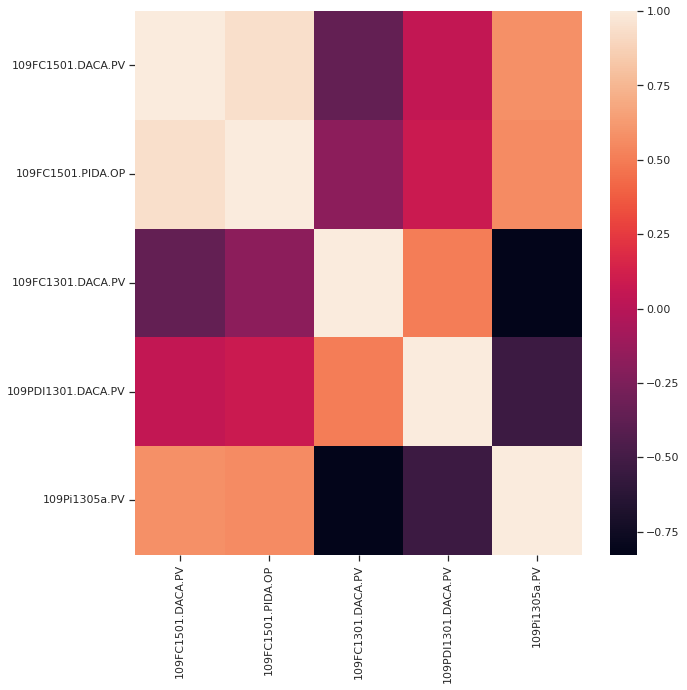

In [52]:
corr_matrix = pd.DataFrame(features[:10].corr())
# plotting correlation heatmap
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 10})
dataplot = sb.heatmap(features[:10].corr())

plt.show()

In [53]:
X = features
Y = labels

In [54]:
import sklearn.preprocessing

In [55]:
X = sklearn.preprocessing.minmax_scale(X)

In [56]:
from pandas.core.frame import DataFrame
X = DataFrame(X,columns=[sel_features])

In [57]:
X

,109FC1501.DACA.PV,109FC1501.PIDA.OP,109FC1301.DACA.PV,109PDI1301.DACA.PV,109Pi1305a.PV
0,0.809651,0.749644,0.783843,0.12,0.902778
1,0.806971,0.749644,0.778714,0.12,0.916667
2,0.817694,0.749644,0.767906,0.12,0.958333
3,0.812332,0.749644,0.755999,0.12,0.986111
4,0.828418,0.749644,0.756182,0.08,0.972222
...,...,...,...,...,...
1989,0.806971,0.881935,0.827258,0.12,0.916667
1990,0.745308,0.766714,0.759846,0.12,0.916667
1991,0.721180,0.749644,0.733101,0.12,0.944444
1992,0.718499,0.749644,0.729071,0.12,0.930556


In [58]:
Y=DataFrame(labels.array)
Y

,0
0,97.07
1,97.15
2,97.66
3,97.43
4,97.82
...,...
1989,93.48
1990,93.24
1991,95.32
1992,94.58


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [61]:
print(len(X_train))
print(len(Y_train))

1595
1595


In [62]:
Y_train

,0
681,100.93
1318,99.58
858,96.53
454,100.00
594,99.31
...,...
1603,105.22
502,99.81
537,104.62
1220,97.64


In [63]:
X_train

,109FC1501.DACA.PV,109FC1501.PIDA.OP,109FC1301.DACA.PV,109PDI1301.DACA.PV,109Pi1305a.PV
681,0.321716,0.253201,0.428284,0.08,0.833333
1318,0.638070,0.678521,0.595714,0.20,0.875000
858,0.769437,0.749644,0.688404,0.12,0.930556
454,0.479893,0.522048,0.461440,0.16,0.861111
594,0.793566,0.749644,0.788240,0.16,0.916667
...,...,...,...,...,...
1603,0.603217,0.465149,0.714966,0.12,0.416667
502,0.911528,0.901849,0.795017,0.16,0.916667
537,0.697051,0.607397,0.555596,0.12,0.833333
1220,0.584450,0.650071,0.690786,0.16,0.847222


In [64]:
 import statsmodels.api as sm
 # add constant (intercept) manually
 X_train = sm.add_constant(X_train)
 # fit training data
 model = sm.GLSAR(Y_train, X_train).fit()

 df = pd.concat((model.params, model.tvalues), axis=1)
 #df.rename(columns={0: 'beta', 1: 't'}).to_excel('output.xls', 'sheet1')
 model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      0   R-squared:                       0.614
Model:                          GLSAR   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     504.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        06:02:01   Log-Likelihood:                -3406.0
No. Observations:                1594   AIC:                             6824.
Df Residuals:                    1588   BIC:                             6856.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     104.7347      0.465    225.435      0.000     103.823     105.646
('109FC1501.DACA.PV',)     22.5904      0.777     29.081      0.000      21.067      24.114
('109FC1501.PIDA.OP',)     -8.6138      0.712    -12.102      0.000     -10.010      -7.218
('109FC1301.DACA.PV',)    -20.3625      0.492    -41.425      0.000     -21.327     -19.398
('109PDI1301.DACA.PV',)    15.2534      0.862     17.690      0.000      13.562      16.945
('109Pi1305a.PV',)         -4.2005      0.514     -8.167      0.000      -5.209      -3.192
==============================================================================
Omnibus:                      140.734   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.390
Skew:                          -0.198   Prob(JB):                    2.08e-165
Kurtosis:                       6.356   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_test1 = sm.add_constant(X_test)
Y_pred= model.predict(X_test1[-100:])

In [66]:
Y_test

,0
1683,96.03
1719,96.98
507,103.49
868,101.18
593,100.11
...,...
1701,95.62
1716,96.97
1251,99.68
702,95.21


In [67]:
Y_test.dtypes

0    float64
dtype: object

In [68]:
Y_pred

731     100.523810
111      94.738665
738     100.020729
1494     97.796225
1480     99.425998
           ...    
1701     95.818748
1716     96.015384
1251     98.610831
702      97.345575
947      97.256350
Length: 100, dtype: float64

In [69]:
test_pred_comparison = pd.DataFrame(list(zip(Y_test,Y_pred)),columns = ['Actual','Predicted'])
test_pred_comparison.head()

,Actual,Predicted
0,0,100.52381


In [70]:
Y_test = Y_test[-100:].squeeze()

In [71]:
test_pred_comparison = pd.DataFrame(list(zip(Y_test,Y_pred)),columns = ['Actual','Predicted'])
test_pred_comparison.head(10)

,Actual,Predicted
0,101.32,100.523810
1,95.32,94.738665
2,103.37,100.020729
3,98.32,97.796225
4,98.64,99.425998
5,97.40,97.467553
6,96.73,97.285993
7,105.29,101.415730
8,97.92,98.462803
9,97.48,98.105014


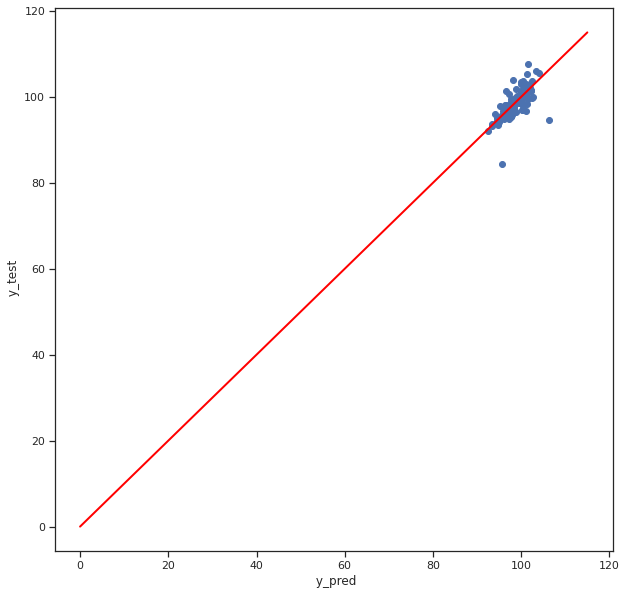

In [77]:
import numpy as np
import matplotlib.pyplot as plt

x = Y_pred
y = Y_test

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(x, y)


plt.xlabel(" y_pred")
plt.ylabel(" y_test")
plt.plot([0, 115], [0, 115], color = 'red', linewidth = 2)

plt.show()

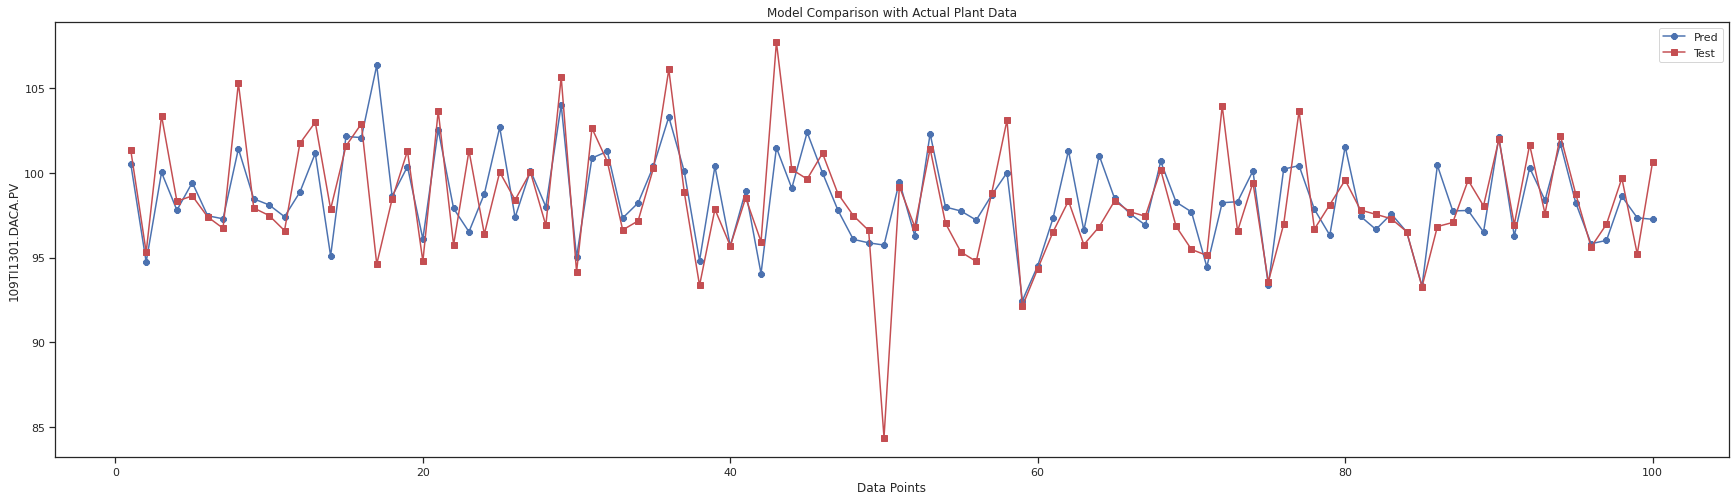

In [78]:
sno = []
for i in range(0,len(Y_test)):
  sno.append(i+1)


import matplotlib.pyplot as plt

import numpy as np

y1 = Y_pred
y2 = Y_test
x = sno
# Plotting the Data
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(x, y1, label='Pred',c='b',marker='8')
plt.plot(x, y2, label='Test',c='r',marker='s')
plt.xlabel('Data Points')
plt.ylabel(lbl)
plt.title("Model Comparison with Actual Plant Data")

  
  
plt.legend()

In [79]:
from sklearn.metrics import mean_squared_error

  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_test,Y_pred)

6.110997402041026

In [80]:
#calculating root_mean_squared_error

np.sqrt(mean_squared_error(Y_test,Y_pred))

2.472043163466412

In [81]:
from sklearn.metrics import r2_score

r2_score(Y_test,Y_pred)

0.44556219503885464